## Actions

Implement a model in Jupyter Notebook and discuss the following topics:
 - Describe the problem
   - What is the problem? 
   - What is the type of machine learning?
   - What are the feature variables and target variables?
 - Data exploration and preprocessing
   - How did you explore the data?
   - How did you clean the data (are there missing or invalid values)?
 - Modeling
   - Split 20% data as the test set using the random status 123.
   - What machine learning algorithms were used? Which is better?
   - What evaluation metric do you prefer?
   - How did you evaluate model's performance? 
   - How did you diagnose the model? Is it overfitting, under fitting, or good fitting?
 - Results and discussion
   - What is your model's results? Is it good? Do you have any concerns?

## Describe the problem  

### What is the problem?
In our data file, we are given a target value, which is whether a customer or not defaulted. To train our model, we are given parameters relevant to the customer's account and demographics, like credit limit, bill statements by month, past payment history, and more. In total, we started with 23 raw variables as features, and using this we are attempting to find the likelihood of a customer defaulting on their account.

### What is the type of machine learning? test

We determined that the type of machine learning is supervised, as we are using data to train or supervise an algorithm in order to figure out the likelihood of a customer defaulting.

### What are the feature variables?

X1: This variable is the amount of credit given to the customer, the total line of credit.

X2: This is a binary variable classifying whether the customer is male or female.

X3: This is a categorical variable classifying the education level of the customer. 1 corresponds to graduate school, 2 corresponds to university, 3 corresponds to high school, 4 corresponds to anything else.

X4: This is a categorical variable the classifies the marital status of the customer, 1 corresponding to married, 2 corresponding to single, 3 corresponding to anything else.

X5: This is a numerical integer value that corresponds to a customer's age.

X6-X11: These are a group of categorical values that correspond to a customer's history of past payment. -1 corresponds to properly paying every month, or "pay duly", 1-8 corresponds to 1-8 month delay in payments (ex. 6 is 6 month delay in payments), 9 corresponds to 9 months and anything above. X6 begins in September 2005, and ends with X11 at April 2005, iterating backwards monthly.

X12-X17: These are group of numerical values that correspond to a monthly balance on a customer's account. If this variable was 500, for example, then the customer owed 500 that month.

X18-X23: These are a group of numerical values that correspond to the amount of payment the month previous. X18 corresponds to amount paid in September 2005, and iterates monthly backwards until X23 corresponds to April, 2005.

Target Variable: This is a binary variable, corresponding to whether or not a customer defaulted. 1 will correspond to a default, 0 corresponds to not default.

## Data Exploration and Preprocessing

### How did we explore the data?

#### Preprocessing

We begin analyzing the data by importing it from the server containing the data, as well as checking the head, or the 5 initial entries, to see how the data is formatted and get an understanding for what we're working with. In this case we also relabeled the data in order to make it more readable.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv', header=0)

df.rename(columns ={'X1' : 'Credit',
                   'X2' : 'SEX',
                   'X3' : 'Education',
                   'X4' : 'Marital_Stat',
                   'X5' : 'Age',
                   'X6' : 'R_Stat Sep-05',
                   'X7' : 'R_Stat Aug-05',
                   'X8' : 'R_Stat Jul-05',
                   'X9' : 'R_Stat Jun-05',
                   'X10' : 'R_Stat May-05',
                   'X11' : 'R_Stat Apr-05',
                   'X12' : 'STMT_BAL Sep-05',
                   'X13' : 'STMT_BAL Aug-05',
                   'X14' : 'STMT_BAL Jul-05',
                   'X15' : 'STMT_BAL Jun-05',
                   'X16' : 'STMT_BAL May-05',
                   'X17' : 'STMT_BAL Apr-05',
                   'X18' : 'Prev_Pmt Sep-05',
                   'X19' : 'Prev_Pmt Aug-05',
                   'X20' : 'Prev_Pmt Jul-05',
                   'X21' : 'Prev_Pmt Jun-05',
                   'X22' : 'Prev_Pmt May-05',
                   'X23' : 'Prev_Pmt Apr-05',
                   'Y' : 'Default'},
         inplace = True)

df.head()


,ID,Credit,SEX,Education,Marital_Stat,Age,R_Stat Sep-05,R_Stat Aug-05,R_Stat Jul-05,R_Stat Jun-05,...,STMT_BAL Jun-05,STMT_BAL May-05,STMT_BAL Apr-05,Prev_Pmt Sep-05,Prev_Pmt Aug-05,Prev_Pmt Jul-05,Prev_Pmt Jun-05,Prev_Pmt May-05,Prev_Pmt Apr-05,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Next, we called the info() function in order to get an understanding of the datatypes for each feature, as well as check for any null values, as we want to guarantee there are none. We also check the shape of the dataframe to see how many entries we have.

In [243]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   Credit           30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   Education        30000 non-null  int64
 4   Marital_Stat     30000 non-null  int64
 5   Age              30000 non-null  int64
 6   R_Stat Sep-05    30000 non-null  int64
 7   R_Stat Aug-05    30000 non-null  int64
 8   R_Stat Jul-05    30000 non-null  int64
 9   R_Stat Jun-05    30000 non-null  int64
 10  R_Stat May-05    30000 non-null  int64
 11  R_Stat Apr-05    30000 non-null  int64
 12  STMT_BAL Sep-05  30000 non-null  int64
 13  STMT_BAL Aug-05  30000 non-null  int64
 14  STMT_BAL Jul-05  30000 non-null  int64
 15  STMT_BAL Jun-05  30000 non-null  int64
 16  STMT_BAL May-05  30000 non-null  int64
 17  STMT_BAL Apr-05  30000 non-null  int64
 18  Prev_P

(30000, 25)

Since there are 30,000 entries in our list and all parameters list 30,000 non-null entries, we guarantee that there are no null entries in our list.

We identified no need to further preprocess any categorized data, 

#### Exploring the data

We used multiple methods to explore our data. 

We started with the description function to get a written description of some of the characteristics of our features.

In [244]:
df.describe()

,ID,Credit,SEX,Education,Marital_Stat,Age,R_Stat Sep-05,R_Stat Aug-05,R_Stat Jul-05,R_Stat Jun-05,...,STMT_BAL Jun-05,STMT_BAL May-05,STMT_BAL Apr-05,Prev_Pmt Sep-05,Prev_Pmt Aug-05,Prev_Pmt Jul-05,Prev_Pmt Jun-05,Prev_Pmt May-05,Prev_Pmt Apr-05,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From this, we can note some interesting qualities, our average credit limit in this dataset is $167,484, average age is 35.48. 

We can also derive interesting information by averaging and combining the monthly statement balance into one variable.

In [245]:
avgbal = df.iloc[:, 12:18].mean(axis=1)
avgbal.describe()

count     30000.000000
mean      44976.945200
std       63260.721860
min      -56043.166667
25%        4781.333333
50%       21051.833333
75%       57104.416667
max      877313.833333
dtype: float64

From this, we can note that customers, on average, carry a monthly balance of $44,976.94. We also note, on the lower quartile, that customers tend to carry around $4,781.33 of debt month to month, along with the upper quartile carrying around $57,104.41 on their monthly balance. 

We can also get a detailed description from studying the histogram of the average balance variable.

<AxesSubplot:>

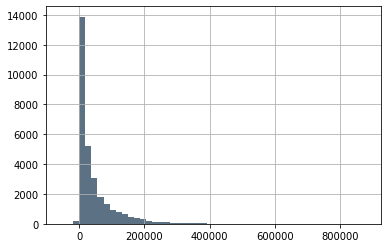

In [246]:
avgbal.hist(bins=50, color=(0.2, 0.3, 0.4, 0.8))

From this, we can note that the data is heavily positively skewed, and drops off very rapidly.

We can also use the histogram function to study the rest of the variables to note any interesting trends.

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Credit'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Marital_Stat'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'R_Stat Sep-05'}>,
        <AxesSubplot:title={'center':'R_Stat Aug-05'}>,
        <AxesSubplot:title={'center':'R_Stat Jul-05'}>,
        <AxesSubplot:title={'center':'R_Stat Jun-05'}>],
       [<AxesSubplot:title={'center':'R_Stat May-05'}>,
        <AxesSubplot:title={'center':'R_Stat Apr-05'}>,
        <AxesSubplot:title={'center':'STMT_BAL Sep-05'}>,
        <AxesSubplot:title={'center':'STMT_BAL Aug-05'}>,
        <AxesSubplot:title={'center':'STMT_BAL Jul-05'}>],
       [<AxesSubplot:title={'center':'STMT_BAL Jun-05'}>,
        <AxesSubplot:title={'center':'STMT_BAL May-05'}>,
        <AxesSubplot:title={'center':'STMT_BAL Apr-05'}>,
        <AxesSubplot

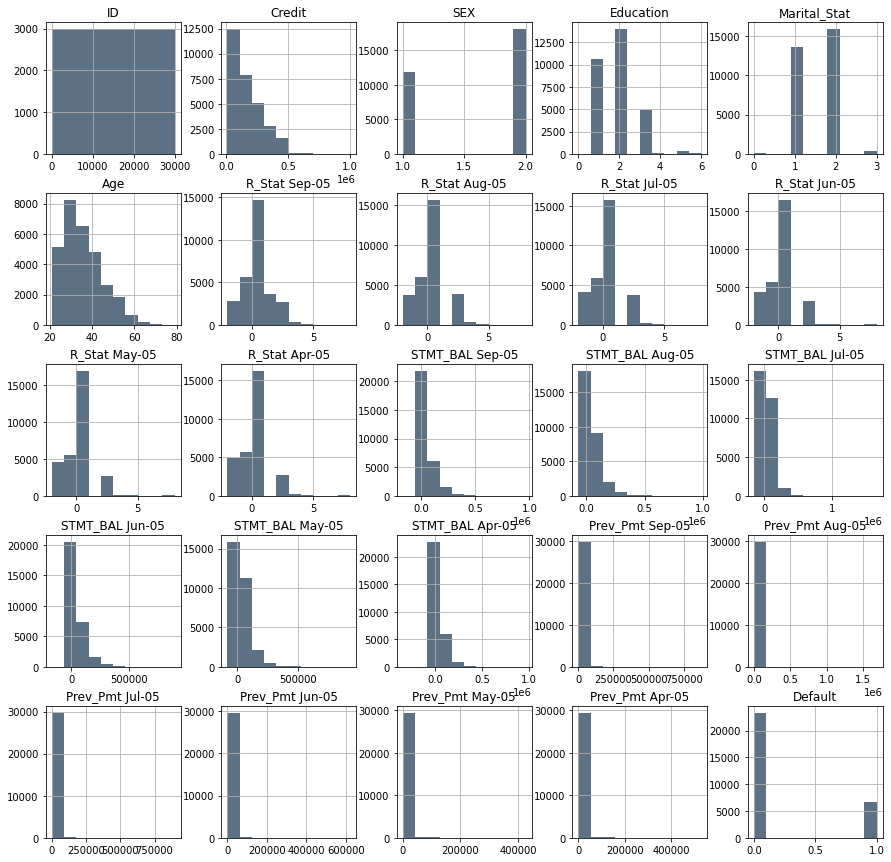

In [247]:
df.hist(figsize=(15,15), color=(0.2, 0.3, 0.4, 0.8))

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: Age, dtype: float64


<AxesSubplot:>

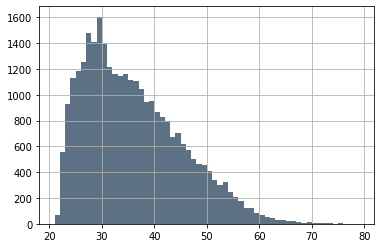

In [248]:
print(df['Age'].describe())
rng = df['Age'].describe()['max'] -  df['Age'].describe()['min']
df['Age'].hist(bins=int(rng), color=(0.2, 0.3, 0.4, 0.8))

From this histogram, as well as our range calculation we are able to see that our dataset encompasses customers across 58 years of age, from 21 to 79. We are able to see that the highest proportion of customers is between 28 and 41, with it steadily dropping off after 41, until our highest customer at 79.

We then continued with our target, along with credit limit, age, marital status, and sex of the customer.

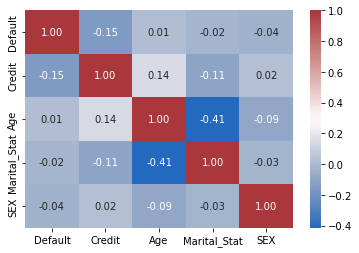

In [249]:
g = sns.heatmap(df[['Default', 'Credit', 'Age' , 'Marital_Stat', 'SEX']].corr(),annot=True, fmt =".2f", 
                cmap = "vlag") 

We note that other than the fairly negative correlation between marital status and age (lower marital status means married, so a higher age being more likely to have a higher chance of being married), there are not many other strong correlations. 

There is a slight negative correlation between credit and default status, meaning, although very slightly, the lower your credit limit the more likely your default status is to be 1, or positive.

After this, took a look at a heat map across statement balances.

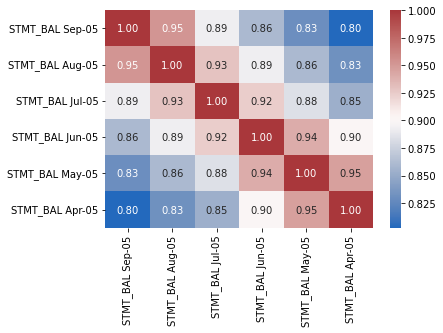

In [250]:
g = sns.heatmap(df[['STMT_BAL Sep-05', 'STMT_BAL Aug-05', 'STMT_BAL Jul-05', 'STMT_BAL Jun-05', 
                    'STMT_BAL May-05', 'STMT_BAL Apr-05']].corr(),annot=True, fmt =".2f", cmap = "vlag") 

We notice that there is typically a very strong positive correlation between balances month to month, meaning if you have a high balance the previous month, you are very likely to have a high balance the current month. This correlation drops off with the distance between months, meaning two months is less correlated than one month, three less than two, etc.

On our next heat map, we took a look at the month to month correlation between previous month payments.

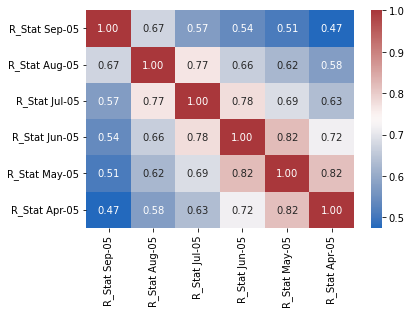

In [251]:
g = sns.heatmap(df[['R_Stat Sep-05', 'R_Stat Aug-05', 'R_Stat Jul-05', 'R_Stat Jun-05',
                    'R_Stat May-05', 'R_Stat Apr-05']].corr(),annot=True, fmt =".2f", cmap = "vlag")

This heat map looks fairly similar to the previous heat map, in that there is typically a positive month to month correlation between previous monthly payments, however we note that it is not nearly as strong as the previous heat map.

Next, we plot our credit limits across sexes to see what the distribution looks like.

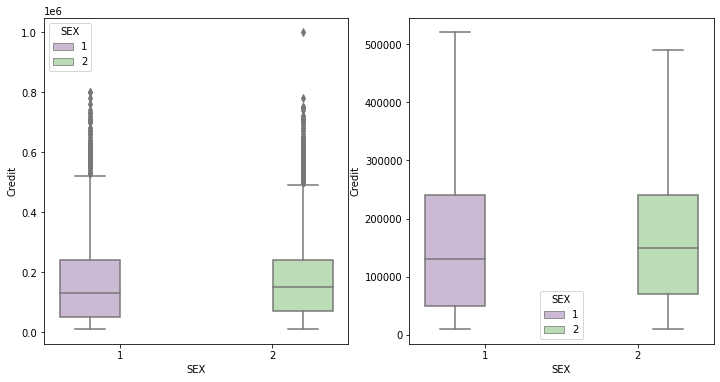

In [252]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="Credit", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="Credit", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show()

On the left, we have a chart showing the proportions of credit limit, and on the right we have the raw values of credit limit. We note that there are a couple of high outliers for female customers. 

We also notice that, for the most part, there is a similar mean credit limit, as well as fairly similar upper bounds, however we note that the male customers tend to have a slightly higher ceiling for credit limit.

Next, to get a better view and feeling of our demographics, we combined the marital status across the gender box plots similar to this, however we plotted these against age instead to get a feeling for what age range and gender is typically married.

Remember that in this chart, 0 is the mix of all of them, 1 corresponds to married, 2 corresponds to single, 3 corresponds to any other status.


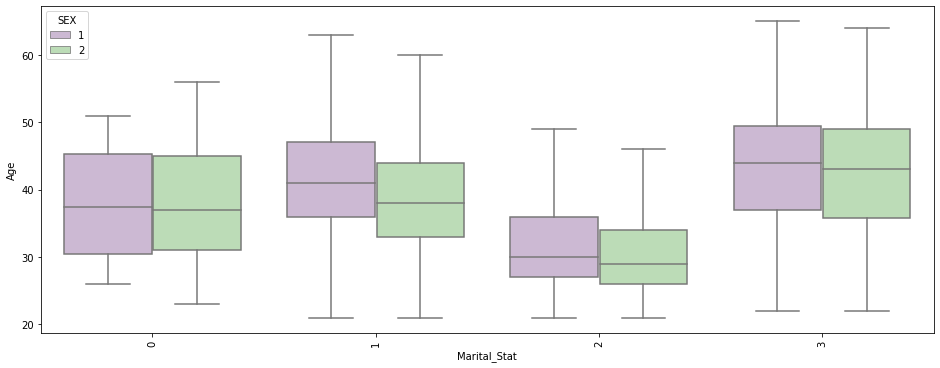

In [253]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

boxplot_variation('Marital_Stat','Age', 'SEX')

As we see, in general we have a broader age distribution of women customers out of any of these categories, however this trend reverses to having a slightly higher upper bound of married men.

Other trends that we can note with married customers, we notice that the mean age for men is a hair above 40, whereas for women it is slightly below 40. We also note that the quartiles for women are lower than they are for men.

We noticed that for single customers, the average of these customers tend to be much lower than those of their married counterparts, being around 30 for men and women, with women having a slightly lower age on average. The upper bounds for single men are slightly higher than those for single women.

We did not notice any interesting trends with the "other" category, it is broad, has around the same range, bounds, quartiles, and averages.

Next, we decided to take a look at this previous information, but combined with education status. 

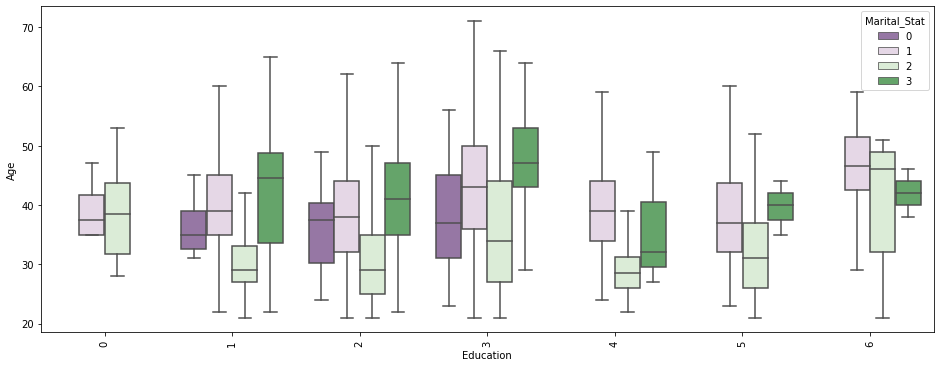

In [254]:
boxplot_variation('Education','Age', 'Marital_Stat')

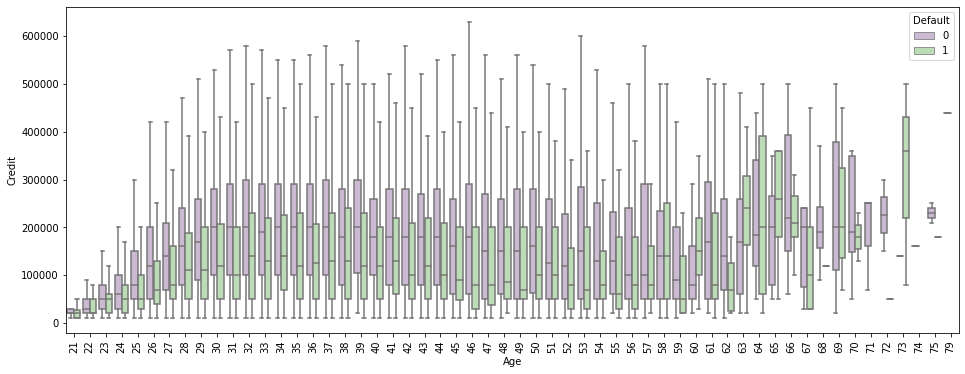

In [255]:
boxplot_variation('Age','Credit', 'Default',16)



We also took a look of distribution plots of age across those who have defaulted, and those who have not as to see if there are any similarities, along with the KDE curve.

c:\Users\Evann Hall\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Evann Hall\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


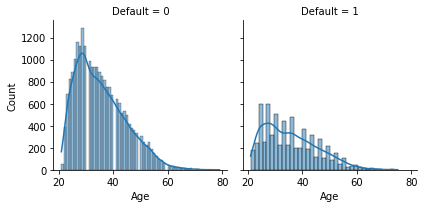

In [256]:
g = sns.FacetGrid(df, col='Default')
g = g.map(sns.histplot, "Age", kde=True) #Age of those not and in default

From these charts, we begin by noting that a default variable of 0 corresponds to a lack of default, or no default, and 1 corresponds to a customer defaulting. 

In these plots, we can see that there is a heavier distribution of younger customers that both hold accounts, however there is a higher amount of younger customers than older customers defaulting. We further explore this with a kde plot.

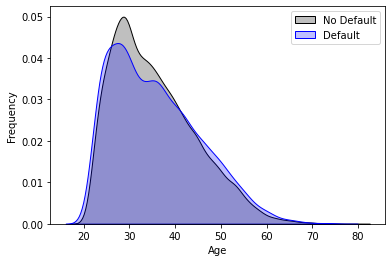

In [257]:
# Explore Age distibution
g = sns.kdeplot(df["Age"][(df["Default"] == 0) & (df["Age"].notnull())], color="Black", fill = True)
g = sns.kdeplot(df["Age"][(df["Default"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", fill= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["No Default","Default"])

This again tells us that most of our customers in general are younger, especially around age 30, and it also shows that our younger customers are more likely to default, and just past age 40 is when there are less customers defaulting than those who are not defaulting.

#### How did we clean the data?

We began our project by calling the head, info and shape functions. We did this to show how many entries we have, which is 30,000 entries, as well as the datatypes of every entry, and last which entries were null, and since we had 30,000 non-null entries for all columns, we could safely assume our data needs no further processing with missing data. 

We then took our dataset, split our columns, and sending the first 23 columns to our X variable, and our last target column as our y variable. Then, we decided to combine our monthly balances into an average to one monthly balance avg column, to reduce dimensionality.


We used a standard scaler to scale our data.

In [258]:
df['avgbal'] = df.iloc[:, 12:18].mean(axis=1)
df['avgpayment'] = df.iloc[:, 18:24].mean(axis=1)
df.drop(columns=df.iloc[:, 12:24].columns, inplace=True)

target = df.iloc[:, 12]

print(target)


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64


To make life easier, we rearrange and reassign our X and y variables.

In [259]:
df.drop(columns=["Default"], axis=0, inplace=True)
df.drop(columns=["ID"], axis=0, inplace=True)
df = df.assign(Default = target)
print(df.head())



   Credit  SEX  Education  Marital_Stat  Age  R_Stat Sep-05  R_Stat Aug-05  \
0   20000    2          2             1   24              2              2   
1  120000    2          2             2   26             -1              2   
2   90000    2          2             2   34              0              0   
3   50000    2          2             1   37              0              0   
4   50000    1          2             1   57             -1              0   

   R_Stat Jul-05  R_Stat Jun-05  R_Stat May-05  R_Stat Apr-05        avgbal  \
0             -1             -1             -2             -2   1284.000000   
1              0              0              0              2   2846.166667   
2              0              0              0              0  16942.166667   
3              0              0              0              0  38555.666667   
4             -1              0              0              0  18223.166667   

    avgpayment  Default  
0   114.833333        1  
1   

In [260]:
print(df.shape)
df.isna()
df.isnull()

(30000, 14)


,Credit,SEX,Education,Marital_Stat,Age,R_Stat Sep-05,R_Stat Aug-05,R_Stat Jul-05,R_Stat Jun-05,R_Stat May-05,R_Stat Apr-05,avgbal,avgpayment,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We are now down to 10 columns instead of 25. From here we reassign our X and y variables.

In [261]:
X, y = df.iloc[:, :13].values, df.iloc[:, 13].values

## Modeling

### Splitting data into test and training sets

Now that our data is processed, from here we will split our data into test and training sets, and then scale each.

In [262]:
# Split data into 80% train 20% test with a Random State of 123
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,  
                     test_size=0.20,
                     stratify=y,
                     random_state=123)

# Standardizing Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

classifiers = []

Gradient Boosting
Misclassified samples: 1224
Accuracy: 0.796
Decision Tree
Misclassified samples: 1068
Accuracy: 0.822
Random Forest
Misclassified samples: 1942
Accuracy: 0.676
Ada Boost
Misclassified samples: 2124
Accuracy: 0.646
K Nearest Neighbor
Misclassified samples: 1327
Accuracy: 0.779


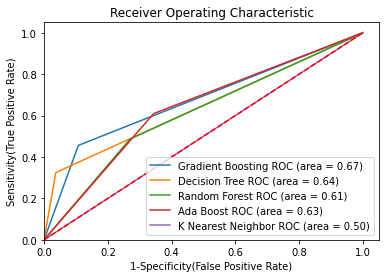

In [263]:
models = {
    GradientBoostingClassifier(learning_rate=0.15, max_depth=6,
                                 max_features=9, min_samples_leaf=20,
                                 n_estimators=20, random_state=123).fit(X_train_std, y_train): "Gradient Boosting",

    DecisionTreeClassifier(min_samples_split=0.2, max_features=13, random_state=123): "Decision Tree",
    RandomForestClassifier(random_state=123): "Random Forest",
    AdaBoostClassifier(random_state=123): "Ada Boost",
    KNeighborsClassifier(n_neighbors = 5): "K Nearest Neighbor"
}

for model in models:
    model.fit(X_train, y_train)

names = []
accuracies = []

for model, name in models.items():
    print(name)

    y_pred = model.predict(X_test_std)
    print('Misclassified samples: %d' % (y_test != y_pred).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

    names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc
    plt.plot(false_positive_rate, true_positive_rate, label='%s ROC (area = %0.2f)' % (name, roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
    

<BarContainer object of 5 artists>

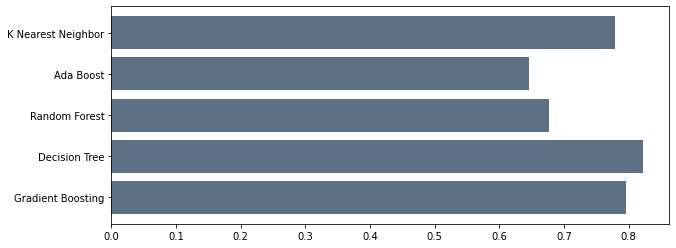

In [264]:
plt.figure(figsize=(10,4))
plt.barh(names, accuracies, color=(0.2, 0.3, 0.4, 0.8))

Misclassified samples: 1236
Accuracy: 0.794


Text(0.5, 0, 'Feature Importance')

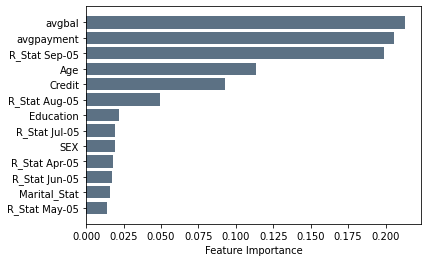

In [265]:
# Gradient Boosting Classifier
clf = GradientBoostingClassifier(learning_rate=0.35, max_depth=20,
                                 max_features=13, min_samples_leaf=20,
                                 n_estimators=100, random_state=123).fit(X_train_std, y_train)

# Determining Misclassified Samples and Model Accuracy
y_pred = clf.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# AUC metric to test model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

sort = clf.feature_importances_.argsort()
plt.barh(df.columns[sort], clf.feature_importances_[sort], color=(0.2, 0.3, 0.4, 0.8))
plt.xlabel("Feature Importance")

Misclassified samples: 1180
Accuracy: 0.803


Text(0.5, 0, 'Feature Importance')

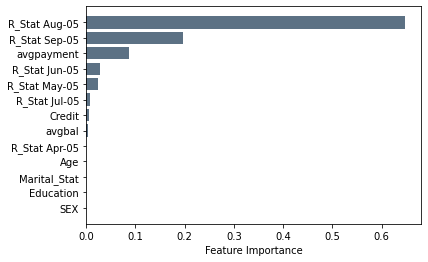

In [266]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=0.2, max_features=7, random_state=123).fit(X_train_std, y_train)

# Determining Misclassified Samples and Model Accuracy
y_pred = tree.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# AUC metric to test model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

sort = tree.feature_importances_.argsort()
plt.barh(df.columns[sort], tree.feature_importances_[sort], color=(0.2, 0.3, 0.4, 0.8))
plt.xlabel("Feature Importance")

## Which machine learning algorithms were used? Which is better?

For this assignment we tried numerous models, including Gradient Boosting, Decision Tree/Random Forest, ADABoost, KNN. Below, the bar chart shows our performance of each model, as a perecentage of how many correct classifications were given.

### Which is better?

From the data below, we can see that the Decision Tree algorithm tended to have the best performance, at around 82.3%. We continued evaluation of this model below. 



<BarContainer object of 5 artists>

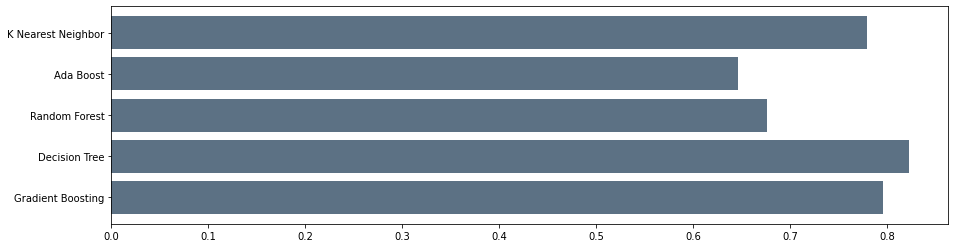

In [267]:
plt.figure(figsize=(15,4))
plt.barh(names, accuracies, color=(0.2, 0.3, 0.4, 0.8))

### Model Evaluation

We initially prefered to use the confusion matrix to evaluate performance.

Misclassified samples: 1180
Accuracy: 0.803


Text(0.5, 0, 'Feature Importance')

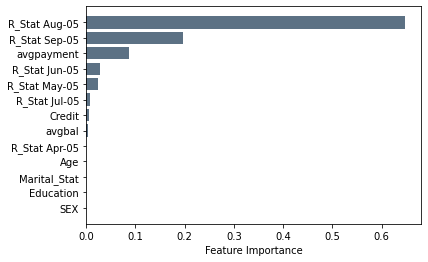

In [268]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(min_samples_split=0.2, max_features=7, random_state=123).fit(X_train_std, y_train)

# Determining Misclassified Samples and Model Accuracy
y_pred = clf.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# AUC metric to test model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

sort = clf.feature_importances_.argsort()
plt.barh(df.columns[sort], clf.feature_importances_[sort], color=(0.2, 0.3, 0.4, 0.8))
plt.xlabel("Feature Importance")

We see that we misclassified 1060 samples, so we use a confusion matrix to get a better understanding as to why.


[[16892  1799]
 [ 2908  2401]]


[Text(0, 0.5, 'Not Defaulted'), Text(0, 1.5, 'Defaulted')]

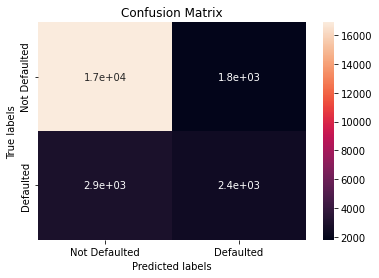

In [269]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)


labels = ['Not Defaulted', 'Defaulted']


cm = metrics.confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

From this, we are able to see that although our model was able to guess correctly around 80% of the time, our model is heavily skewed towards guessing that there was not a default. There are only about 900 instances where our model guessed on a default, and was incorrect, and only around 1500 instances where we predicted a default and were correct.

There were 18,000 instances in which we predicted no default and were correct, and around 3800 instances where we predicted no default but were incorrect.

Below, we show numerical values that indicate the performance of our model.

In [270]:
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = metrics.precision_score(test_class_preds,y_test)
test_recall_score_lr = metrics.recall_score(test_class_preds,y_test)
test_f1_score_lr = metrics.f1_score(test_class_preds,y_test)
test_roc_score_lr = metrics.roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)


The accuracy on train data is  0.803875
The accuracy on test data is  0.8036666666666666
The precision on test data is  0.4461190655614167
The recall on test data is  0.5719806763285025
The f1 on test data is  0.5012701100762067
The roc_score on test data is  0.7119722112760337


# Summary

In this assignment, we were expected to get a good understanding of our problem. We were given a data file that contains features about a set of 30,000 customers, and data pertaining to their credit card account. We were given information like sex of the customer, education level, information about their payment history, and our target variable being whether or not they defaulted. 

We took time to explore our data, and recognized as well as evaluated some trends across features, such as the distribution of average balances, distribution of age, heat maps to quickly and numerically evaluate features across a grid. We also used some box plots with information containing distributions of marital stats, ande finished with distributions of age corresponding to default count.

To clean our data, we took the monthly balances and monthly payments and averaged them across, and then dropped the original columns to reduce dimensionality. We also dropped our ID column as it skewed our model accuracy. We ensured no null/n.a values, and brought the number of colums down from 25 to 10.

On our model, we split our data into test and training data, and then used it to train 5 different models, Gradient Boosting, Decision Tree, Random Forest, ADA boost, and K Nearest Neighbors. We recognized that the decision tree model gave us the highest accuracy at around 80%, so we continued to try to improve this model.

We used grid search to further tune our parameters of the model, and then used methods to evaluate the efficacy of the model, like grid search, as well as reviewed some of the most important features, as well as statistical values like the f1, precision score, and recall score.